In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import cv2
import numpy as np
import tensorflow as tf
import torch
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow


In [14]:
# Set a confidence threshold
CONFIDENCE_THRESHOLD = 0.3

def predict_object(frame, model):
    resized_frame = cv2.resize(frame, (240, 240))
    frame_array = tf.keras.preprocessing.image.img_to_array(resized_frame)
    frame_array = np.expand_dims(frame_array, axis=0)

    result = model.predict(frame_array)
    probabilities = tf.nn.softmax(result).numpy()

    pred_class = np.argmax(probabilities, axis=1)[0]
    confidence = probabilities[0][pred_class]

    if confidence < CONFIDENCE_THRESHOLD:
        return "Cant determine"

    if pred_class == 1:
        return "Green"
    elif pred_class == 2:
        return "Red"
    elif pred_class == 3:
        return "Yellow"
    else:
        return "Cant determine"

In [15]:

def resize_image(rgb_image, size=(32, 32)):
    return cv2.resize(rgb_image, size)

def mask_image_get_brightness_vector(rgb_image):
    resized_image = resize_image(rgb_image, (32, 32))
    hsv = cv2.cvtColor(resized_image, cv2.COLOR_RGB2HSV)

    lower_red1 = np.array([0, 70, 50])
    upper_red1 = np.array([10, 255, 255])
    lower_red2 = np.array([170, 70, 50])
    upper_red2 = np.array([180, 255, 255])

    lower_yellow = np.array([20, 100, 100])
    upper_yellow = np.array([30, 255, 255])

    lower_green = np.array([40, 70, 50])
    upper_green = np.array([80, 255, 255])

    mask_red1 = cv2.inRange(hsv, lower_red1, upper_red1)
    mask_red2 = cv2.inRange(hsv, lower_red2, upper_red2)
    mask_red = cv2.bitwise_or(mask_red1, mask_red2)

    mask_yellow = cv2.inRange(hsv, lower_yellow, upper_yellow)
    mask_green = cv2.inRange(hsv, lower_green, upper_green)

    masked_red_image = cv2.bitwise_and(resized_image, resized_image, mask=mask_red)
    masked_yellow_image = cv2.bitwise_and(resized_image, resized_image, mask=mask_yellow)
    masked_green_image = cv2.bitwise_and(resized_image, resized_image, mask=mask_green)

    # Calculate brightness vector for each color
    red_brightness_sum = np.sum(masked_red_image[:, :, 0])  # Sum of red
    yellow_brightness_sum = np.sum(masked_yellow_image[:, :, 0])  # Sum of yellow
    green_brightness_sum = np.sum(masked_green_image[:, :, 0])  # Sum of green

    # Determine which color has the highest brightness
    color_brightness = {
        'Red': red_brightness_sum,
        'Yellow': yellow_brightness_sum,
        'Green': green_brightness_sum
    }

    max_color = max(color_brightness, key=color_brightness.get)
    return max_color, (resized_image, masked_red_image, masked_yellow_image, masked_green_image)


In [16]:

# Load YOLOv5 model
yolo_model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# Load the CNN model for traffic light detection
cnn = tf.keras.models.load_model('/content/RGY_TRAFFIC_LIGHT_DET.h5')

# Path to your test images
test_image_dir = '/content/drive/MyDrive/TRAFFIC_LIGHTS/TEST_IMAGES'

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-10-31 Python-3.10.12 torch-2.4.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


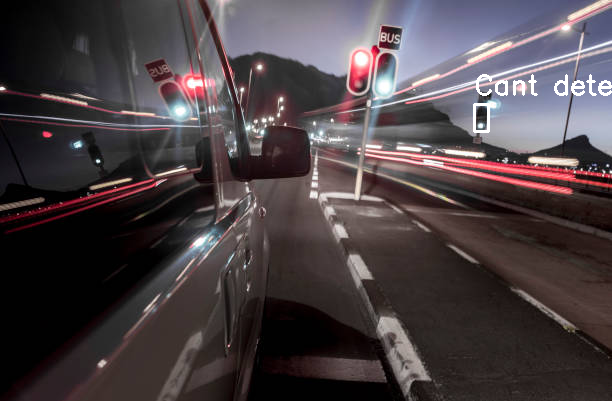

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


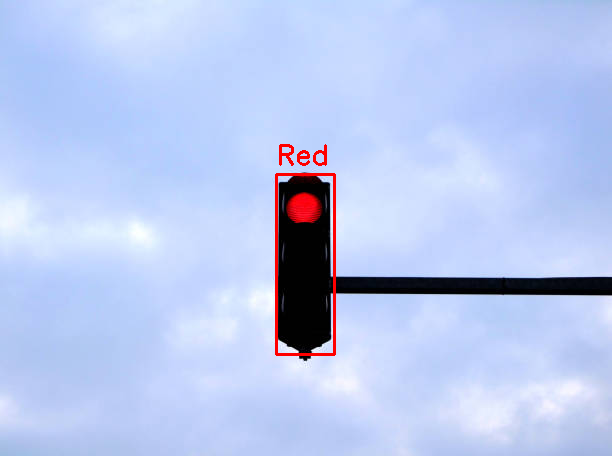

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


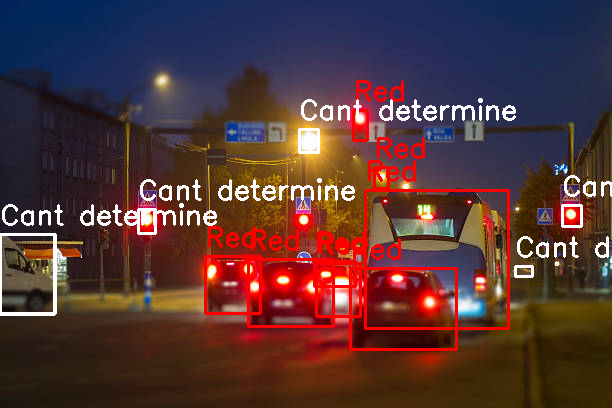

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


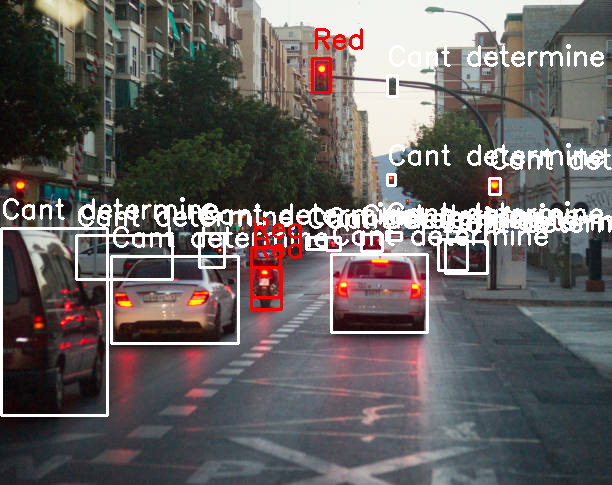

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


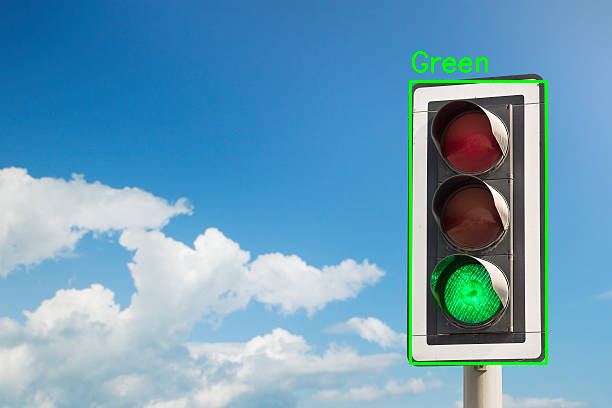

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


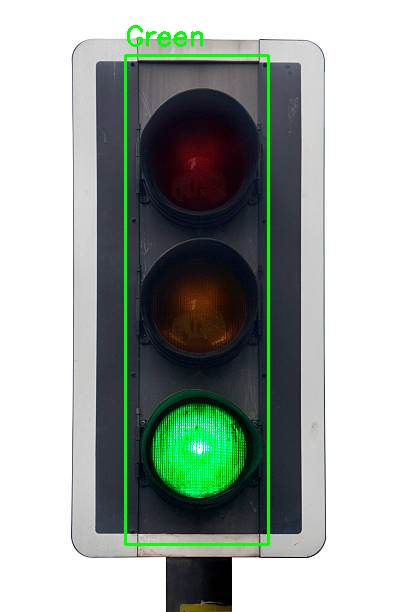

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


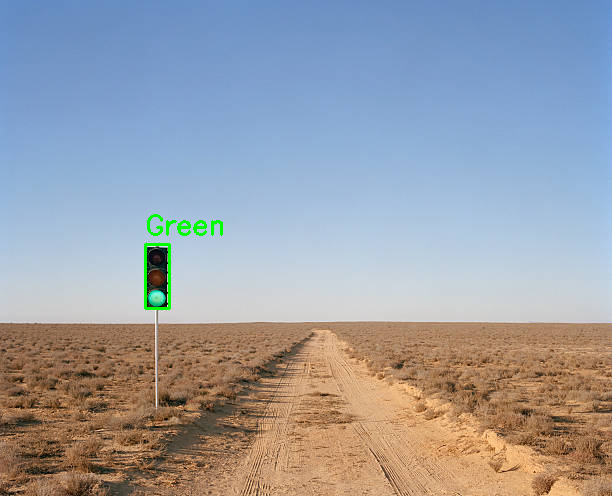

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


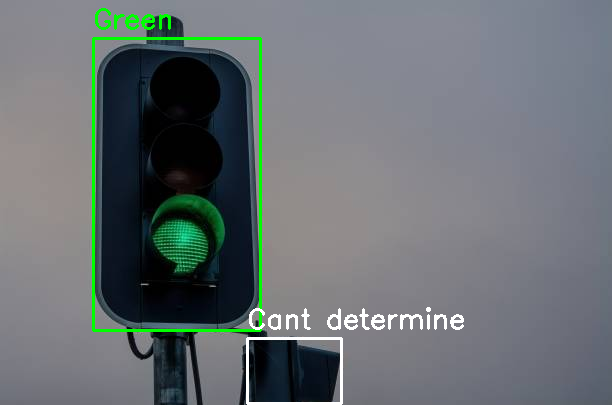

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


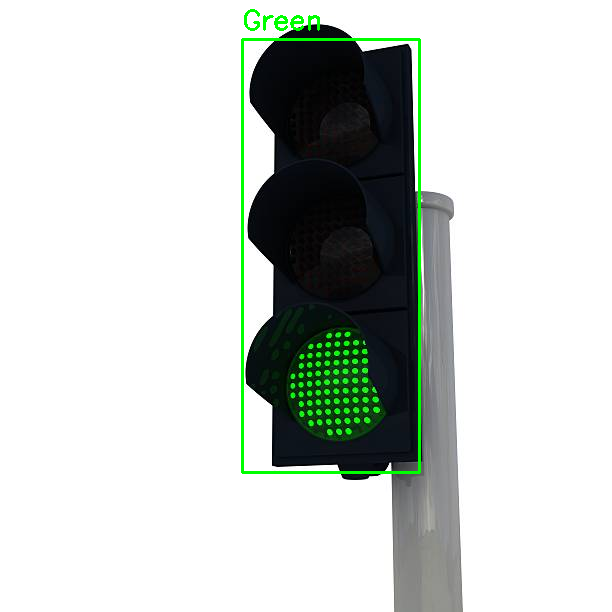

In [17]:

# Inside your image processing loop
for img_name in os.listdir(test_image_dir):
    img_path = os.path.join(test_image_dir, img_name)

    # Load image using OpenCV
    img = cv2.imread(img_path)

    # Inference with YOLOv5
    results = yolo_model(img)
    detections = results.xyxy[0].cpu().numpy()

    # Loop through all detections
    for detection in detections:
        x1, y1, x2, y2, conf, class_id = detection


        object_region = img[int(y1):int(y2), int(x1):int(x2)]

        # Get the prediction for the traffic light state from CNN
        cnn_label = predict_object(object_region, cnn)

        # Get color from brightness masks
        brightness_label, (resized_image, masked_red_image, masked_yellow_image, masked_green_image) = mask_image_get_brightness_vector(object_region)

        # Compare results and determine output
        if cnn_label.lower() == brightness_label.lower():
            final_label = cnn_label
        else:
            final_label = "Cant determine"


        if final_label.lower() == "green":
            color = (0, 255, 0)  # Green
        elif final_label.lower() == "red":
            color = (0, 0, 255)  # Red
        elif final_label.lower() == "yellow":
            color = (0, 255, 255)  # Yellow
        else:
            color = (255, 255, 255)  # White for unknown labels

        # Draw the rectangle and label text
        cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), color, 2)
        cv2.putText(img, final_label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)


    cv2_imshow(img)
